In [53]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/luca/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Models results
*All the following results have been obtained using the initial given parameters, apart from the learning rate that has been set to $10^{-8}$ as that is the suggested Adam optimizer value*

## Early stopping
### Experimental setup
This evaluation has been done using the early stopping method: for each fold, after each training iteration, the NDCG@10 of the validation set is computed and compared with a sliding window of size 5 containing the past validation scores. If the new validation score is better than any of the scores contained in the sliding window, then another training epoch is initiated, the new value is pushed in the sliding window and the score contained at the first index is popped (that is, the oldest registered score). In order to produce the results, a new model is trained for each fold, and the score of the testing dataset is stored in order to be averaged at the end.

### Plots
Below, the plots referring to each epoch training loss, training NDCG@10 and validation NDCG@10 are shown. As the number of epochs was not fixed, we can notice that each model behaves differently from the others in term of total number of iterations.

### Test results
After the plots the test results are shown, calculated as the average of the test scores of all 5 folds. We can clearly see that there is indeed a difference between the three models: the pointwise method has the poorest performance, followed by the other two, that have comparable final scores.

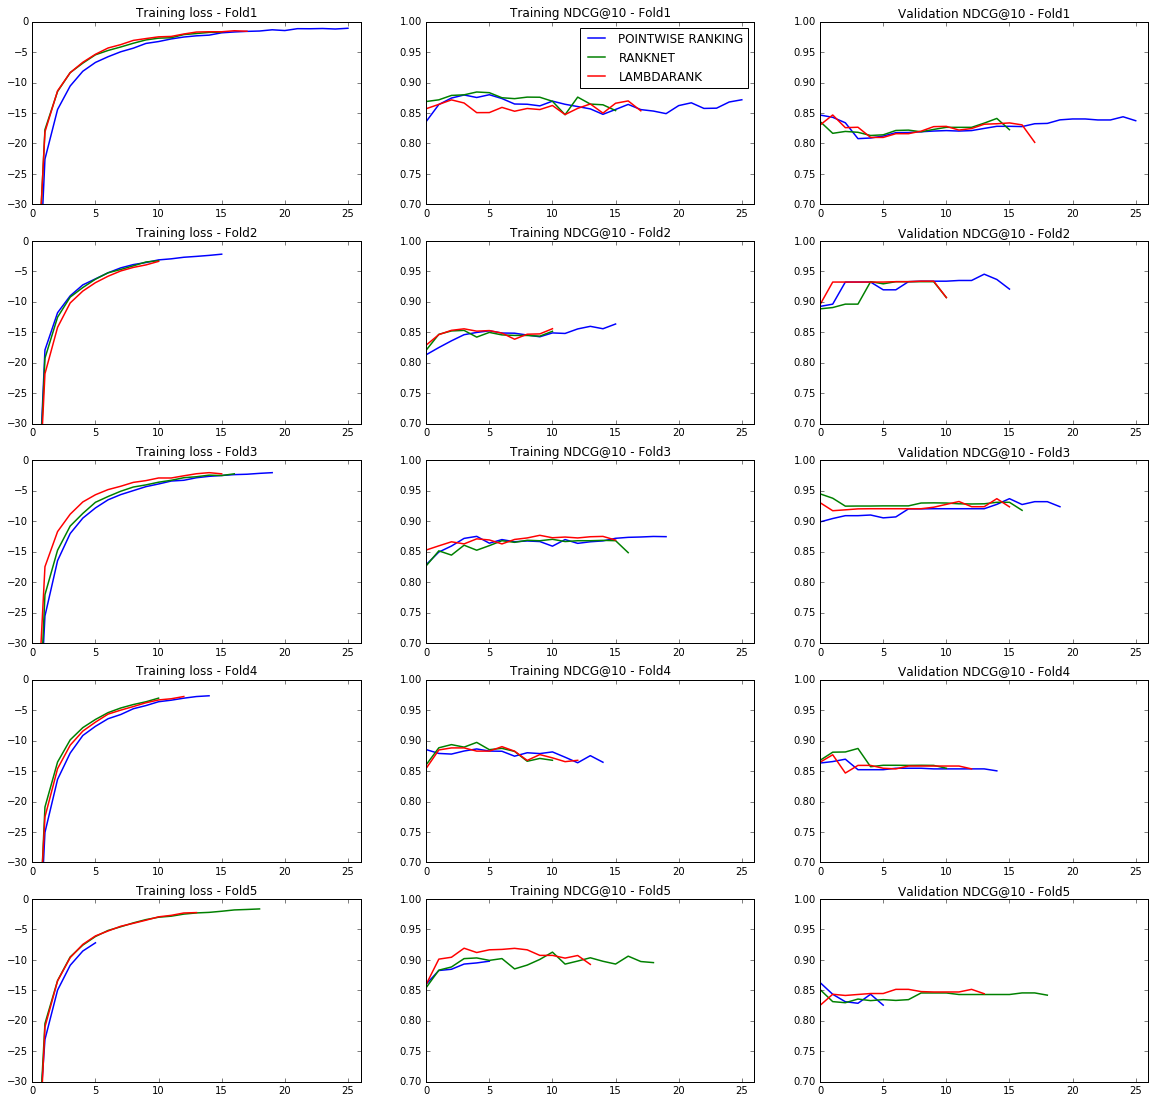

POINTWISE RANKING test NDCG@10 (avg): 0.855154016709
RANKNET test NDCG@10 (avg): 0.871473105661
LAMBDARANK test NDCG@10 (avg): 0.860064694216

POINTWISE RANKING elapsed time: 4.11142639744s
RANKNET elapsed time: 4.02777746543s
LAMBDARANK elapsed time: 3.89499736635s


In [57]:
models = ['POINTWISE RANKING', 'RANKNET', 'LAMBDARANK']
elapsed_time = []
train_loss = []
train_ndcg = []
val_ndcg = []
test_scores = []

for m in range(3):
    elapsed_time.append([])
    train_loss.append([])
    train_ndcg.append([])
    val_ndcg.append([])
    test_scores.append([])
    for i in range(5):
        elapsed_time[m].append([])
        train_loss[m].append([])
        train_ndcg[m].append([])
        val_ndcg[m].append([])
        test_scores[m].append([])
        fold = i+1
        header = True
        
        with open('results_early_stopping/method' + str(m) + '/results' + str(fold) + '.csv') as f:
            for line in f.readlines():
                line = line.replace('\n', '').split(', ')
                if header:
                    header = False
                elif line[0] == '':
                    pass
                elif len(line) == 1:
                    test_scores[m][i].append(float(line[0]))
                else:
                    elapsed_time[m][i].append(float(line[1]))
                    train_loss[m][i].append(float(line[2]))
                    train_ndcg[m][i].append(float(line[3]))
                    if line[4] != '':
                        val_ndcg[m][i].append(float(line[4]))
    
plt.figure(figsize=(20, 19))
for i in range(5):
    for m in range(3):
        plt.subplot(5, 3, i*3+1)     
        plt.title('Training loss - Fold' + str(i+1))
        plt.plot(train_loss[m][i], label=models[m], linewidth=1.5)
        plt.ylim(ymin=-30, ymax=0)
        plt.xlim(xmax=26)
        plt.subplot(5, 3, i*3+2)
        plt.title('Training NDCG@10 - Fold' + str(i+1))
        plt.plot(train_ndcg[m][i], label=models[m], linewidth=1.5)
        plt.ylim(ymin=0.7, ymax=1)
        plt.xlim(xmax=26)
        plt.subplot(5, 3, i*3+3)
        plt.title('Validation NDCG@10 - Fold' + str(i+1))
        plt.plot(val_ndcg[m][i], label=models[m], linewidth=1.5)
        plt.ylim(ymin=0.7, ymax=1)
        plt.xlim(xmax=26)
plt.subplot(5, 3, 2)
plt.legend()
plt.show()
    
for m in range(3):
    print(models[m] + ' test NDCG@10 (avg): ' + str(np.mean(test_scores[m])))
    
print()
for m in range(3):
    mean = []
    for i in range(5):
        mean.append(np.mean(elapsed_time[m][i]))
    print(models[m] + ' elapsed time: ' + str(np.mean(mean)) + 's')

## Fixed number of epochs
### Experimental setup
In this setup we fixed the total number of epochs to 15, in order to see if a substantial difference can emerge when training the model for a longer time. For each fold, a new model is trained for 15 epochs, and the final test results are stored.

### Plots
Below the plots showing both training loss and training NDCG@10 are presented. No validation plots are shown as no parameters have been tuned using this approach. 

### Test results
As before, the test scores are computed as the mean of the test scores for each fold. In this case we can notice a very small difference in performance between the models: the pointwise and pairwise methods seem to score more or less equal, with the listwise approach performing marginally better.

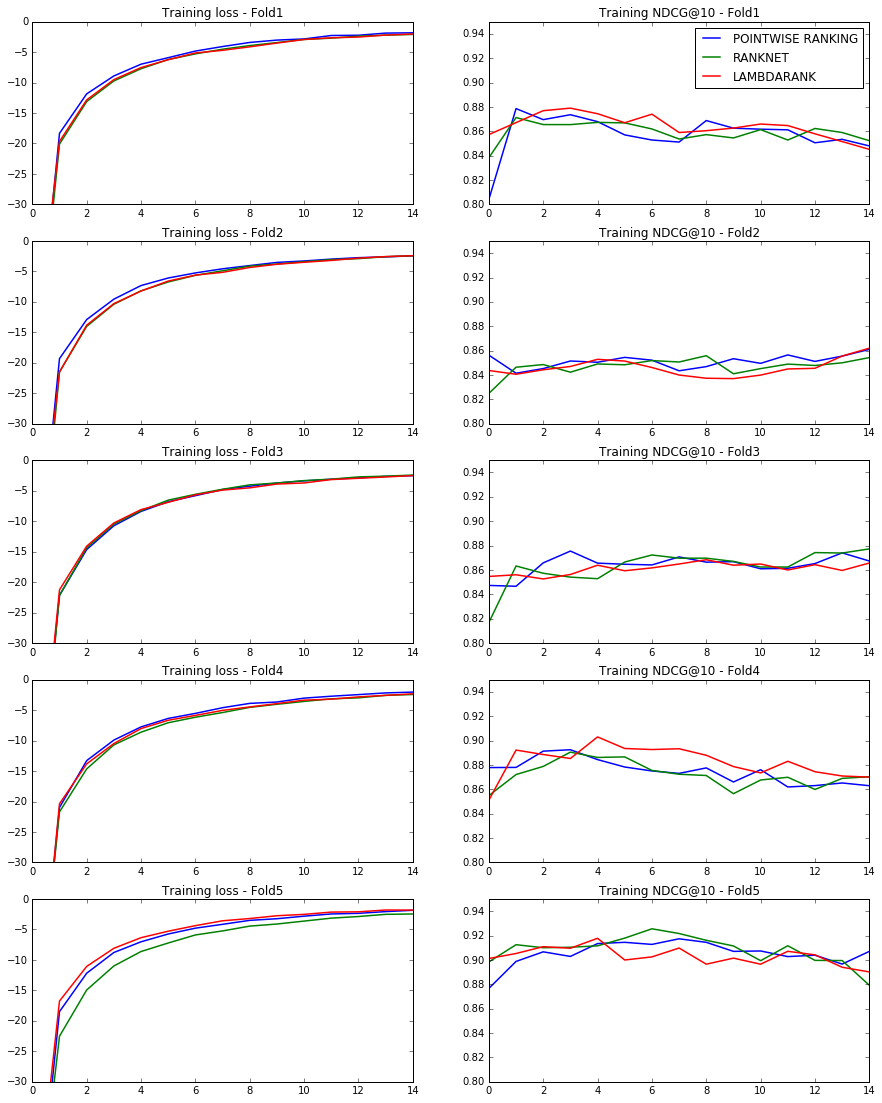

POINTWISE RANKING test NDCG@10 (avg): 0.869006752255
RANKNET test NDCG@10 (avg): 0.864322030052
LAMBDARANK test NDCG@10 (avg): 0.8714988092

POINTWISE RANKING elapsed time: 3.7068833669s
RANKNET elapsed time: 3.76484870593s
LAMBDARANK elapsed time: 3.97485061328s


In [58]:
models = ['POINTWISE RANKING', 'RANKNET', 'LAMBDARANK']
elapsed_time = []
train_loss = []
train_ndcg = []
test_scores = []

for m in range(3):
    elapsed_time.append([])
    train_loss.append([])
    train_ndcg.append([])
    test_scores.append([])
    for i in range(5):
        elapsed_time[m].append([])
        train_loss[m].append([])
        train_ndcg[m].append([])
        test_scores[m].append([])
        fold = i+1
        header = True
        
        with open('results/method' + str(m) + '/results' + str(fold) + '.csv') as f:
            for line in f.readlines():
                line = line.replace('\n', '').split(', ')
                if header:
                    header = False
                elif line[0] == '':
                    pass
                elif len(line) == 1:
                    test_scores[m][i].append(float(line[0]))
                else:
                    elapsed_time[m][i].append(float(line[1]))
                    train_loss[m][i].append(float(line[2]))
                    train_ndcg[m][i].append(float(line[3]))
                
plt.figure(figsize=(15, 19))
for i in range(5):
    for m in range(3):
        plt.subplot(5, 2, i*2+1)     
        plt.title('Training loss - Fold' + str(i+1))
        plt.plot(train_loss[m][i], label=models[m], linewidth=1.5)
        plt.ylim(ymin=-30, ymax=0)
        plt.subplot(5, 2, i*2+2)
        plt.title('Training NDCG@10 - Fold' + str(i+1))
        plt.plot(train_ndcg[m][i], label=models[m], linewidth=1.5)
        plt.ylim(ymin=0.8, ymax=0.95)
plt.subplot(5, 2, 2)
plt.legend()
plt.show()
    
for m in range(3):
    print(models[m] + ' test NDCG@10 (avg): ' + str(np.mean(test_scores[m])))
    
print()
for m in range(3):
    mean = []
    for i in range(5):
        mean.append(np.mean(elapsed_time[m][i]))
    print(models[m] + ' elapsed time: ' + str(np.mean(mean)) + 's')

# Conclusions
We can see that implementing early stopping affected quite negatively the performance of the pointwise model, reducing the test score from 0.87 to 0.86. Although some other differences can be seen in the various models, we cannot clearly tell which of them is the best, first because the differences are too small to be of any relevance and second because we can notice a relatively high variance in the various (folds) scores. LambdaRank is supposed to have faster convergence than RankNet, but the results indicate that for this particular dataset the new model doesn't have improved rates.